# Intro to Pandas

- Series object
- DataFrame object

### Series

In [3]:
# Test so that packages are installed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
import pandas as pd

# Create some data to a dictionary
ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
ourdata2 = dict(AI = "Twenty five", NET = 30, APP = 27, Java = 23)

# Create a pandas series from this
series1 = pd.Series(data = ourdata1)
series2 = pd.Series(data = ourdata2)

# This will print it formated nicely
series1
# also lists dtype, data type, which is the type of the data, not the key
# Here they are ints
# Would be float64 if one or more was a float.
# Series changes all to the same type.
#series2
# dtype here is "object" since strings are objects, all will be objects



AI      Twenty five
NET              30
APP              27
Java             23
dtype: object

In [16]:
import pandas as pd

ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series1 = pd.Series(data = ourdata1)

# Index handling of pd-series
# Extracts only the data, not keys
print(f"series1[0]: {series1[0]}")
print(f"series1[-1]: {series1[-1]}")

# Extract keys (index)
# This gives a list of indeces!
print(f"series.keys(): {series1.keys()}")
# So we can extract keys:
print(f"series.keys()[0]: {series1.keys()[0]}")
print(f"series.keys()[-1]: {series1.keys()[-1]}")



series1[0]: 25
series1[-1]: 23
series.keys(): Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys()[0]: AI
series.keys()[-1]: Java


### Data frame

We can use series and data frame for data with many dimensions...

In [19]:
import pandas as pd

ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series1 = pd.Series(data = ourdata1)

df = pd.DataFrame(series1)

df
# or
#print(df) # .py-style of just writing df



,0
AI,25
NET,30
APP,27
Java,23


In [20]:
# Add to the data frame a list, a column of data.
# Must be a tuple! ie add a ,
df = pd.DataFrame(series1, columns=("Number of students",))
df

,Number of students
AI,25
NET,30
APP,27
Java,23


In [21]:
# Add several columns with a new series
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "JAVA"))

# Add the new series to the dataframe we call df (from above)
# Languages contains the same keys as series1 so we add data to these keys that series1 has.
df = pd.DataFrame({"Students":series, "Language": languages})
df
# If we had an index, a key that did not exist in one or the other, we will get a NaN on that


,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [22]:
# Test
df2 = df
testseries = pd.Series(dict(testkey = "Some data"))

df2 = pd.DataFrame({"Students":series, "Language": languages, "Test column": testseries})
df2

,Students,Language,Test column
AI,25.0,Python,NaN
APP,27.0,Kotlin,NaN
Java,23.0,JAVA,NaN
NET,30.0,C#,NaN
testkey,NaN,NaN,Some data


In [24]:
# To see the indeces of dataframe write
df.index


Index(['AI', 'APP', 'Java', 'NET', 'testkey'], dtype='object')

### Data selection

In [25]:
# Extract only the students-column of dataframe
df.Students
# Extracts a series!
# This can fail. In case we have attributes with this name, collisions cna happen

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [26]:
# Generally it's better to this, gets series with dictionary key approach
# uses __getitem__()
df["Students"]
# Returns a series


AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [27]:
# This way we can call for several columns
df[["Language","Students"]]
# Returns a data frame again. We could say that dataframes are 2d-series.


,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [33]:
# To extract eg all rows with > 24 students
# ie filter!
print(df["Students"] > 24) # Gives true and false. uses __gt__()
# ie gives a bool-series.
print("")

# This is called "masking"

# So take df of df, only returns rows that are true in the bool series.
large_groups = df[df["Students"] > 24] # Save the large groups
large_groups



AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool



,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


### Test seaborn

- plot our large group data frame from above

In [34]:
# Check structure of large groups
# Which column can we plot?
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Number of students in different programs')

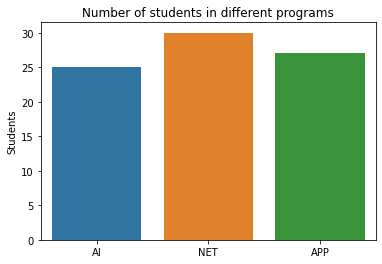

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot students, that contain numbers:
# Chose data to load,
# chose which part should be on the x-axis, 
# chose which column should be on the y axis
sns.barplot(data = large_groups, x = large_groups.index, y="Students")
plt.title("Number of students in different programs") # Compatible with matplotlib!
# though we can use seaborn for such settings also.


## Real data

- uses Kokchuns data in ../data

In [46]:
import pandas as pd

# Load excel data - needs openpyxl
calories = pd.read_excel("../data/calories.xlsx")

# Puts the data into a dara frame
calories
# shows also the size, 2225 rows and 5 columns
# print less, only the beginning, the head, 5 rows
calories.head()
# or only 3 rows
calories.head(3)
# Or a range of rows, start to finish+1
calories.iloc[3:8]


,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ


### First step, exploratory data analysis


In [47]:
# Check info
calories.info()
# All data are objects
# but we want to compute things so we need to change these to floats or ints.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [48]:
# statistics on data
calories.describe()
# gives different numbers, sizes, mazima, minima, freqs

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [50]:
# extract those parts that we are interested in
# eg extract all unique food categories
calories["FoodCategory"].unique()


array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [51]:
# check columns
calories.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [53]:
# Use this info to check what's in 100g
calories["per100grams"].unique()
# Gives 100g and 100ml, because well, we have both liquids and solids

array(['100g', '100ml'], dtype=object)

## Data cleaning strategy

Can we separate liquids and solids, and can we then get which has most calories for each category?

- Convert strings to int or float
- Change column names
- separate liquids and solids

In [59]:
import pandas as pd
# reload data
calories = pd.read_excel("../data/calories.xlsx")

# 1. rename columns (make easier to work with)
# Default is to check rows for this name, we need to force it to look at coumns with axis
# Most of the methods in pandas returns only a new object so we need to save it
# with calories=
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams = "per100"), axis="columns")
#check the end of it
calories.tail()


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [62]:
# 2. Clean the data, remove unit, ie the last three elements
# There are hundred of ways to do this, replace, regex etc
# and change to integers
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
# now dtype is int64!
# check this (and that we don't destroy our data frame :P )
calories.head()


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [63]:
# check the number of solids and liquids
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [65]:
# 3. separate liquids and solids
# use bool list for this, all solids:
# (traditionally with list you would loop, but here we use the operator overloads that
# this class contains)
solids = calories[calories["per100"] == "100g"]
# and for liquids
liquids = calories[calories["per100"] == "100ml"]

# (print these by just writing their names and check the lengths of them)


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ
...,...,...,...,...,...
2173,Sauces&Dressings,Soy Sauce,100ml,67,281 kJ
2182,Sauces&Dressings,Vinaigrette,100ml,120,504 kJ
2183,Sauces&Dressings,Worcestershire Sauce,100ml,78,328 kJ
2184,Sauces&Dressings,Yogurt Dressing,100ml,45,189 kJ


### Find top 5 categories with highest calories

This is the goal of this exercise

In [78]:
# Sort solids by calories
# change order to descending!
solids_top5 = solids.sort_values(by="Calories", ascending=False)
print(solids_top5.head()) # Check

# and for liquids
liquids_top5 = liquids.sort_values(by="Calories", ascending=False)
print(liquids_top5.head())  #Check


     FoodCategory     FoodItem per100  Calories KJ_per100grams
1621        Soups      Goulash   100g      1009        4238 kJ
1761    Oils&Fats         Lard   100g       902        3788 kJ
528     Beef&Veal  Beef Tallow   100g       902        3788 kJ
1756    Oils&Fats    Goose Fat   100g       898        3772 kJ
599          Meat  Chicken Fat   100g       898        3772 kJ
       FoodCategory        FoodItem per100  Calories KJ_per100grams
1751      Oils&Fats   Cod Liver Oil  100ml      1000        4200 kJ
1808  VegetableOils  Wheat Germ Oil  100ml       929        3902 kJ
1800  VegetableOils      Salmon Oil  100ml       911        3826 kJ
1789  VegetableOils    Menhaden Oil  100ml       911        3826 kJ
1759      Oils&Fats     Herring Oil  100ml       902        3788 kJ


KeyboardInterrupt: 

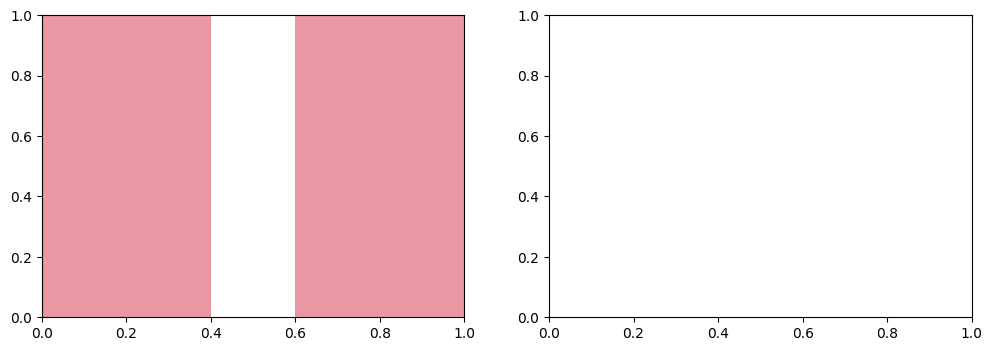

In [80]:
# visualise
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=solids_top5, x="FoodItem", y="Calories", ax=ax[0])
sns.barplot(data=liquids_top5, x="FoodItem", y="Calories", ax=ax[1])
